In [1]:
!pip install pdfplumber


In [11]:
import os
import requests
import pdfplumber
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from io import BytesIO

# Step 1: Load the local HTML file and parse it to extract all the PDF links
filename = "Publikationer.html"

if not os.path.exists(filename):
    raise FileNotFoundError(f"{filename} does not exist!")

with open(filename, 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')
pdf_links = []
for link in soup.find_all('a', href=True):
    if link['href'].endswith('.pdf'):
        pdf_links.append(link['href'])

# Prepare a dictionary to store the results
results = {}

# Step 2, 3, 4: Download, extract text, and analyze each PDF file
for pdf_link in pdf_links:
    try:
        response = requests.get(pdf_link)
        with pdfplumber.open(BytesIO(response.content)) as pdf_file:
            total_words = 0
            data_count = 0
            for page in pdf_file.pages:
                text = page.extract_text()
                if text:  # Check if text is not None
                    words = re.findall(r'\b\w+\b', text)
                    total_words += len(words)
                    data_count += len([word for word in words if word.lower() == 'data'])
            if total_words > 0:
                results[pdf_link] = data_count / total_words * 100
            else:
                results[pdf_link] = 0
    except Exception as e:
        print(f"Error processing PDF {pdf_link}: {e}")

# Sort the results in descending order of frequency
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))


In [13]:
!pip install mplcursors

     |████████████████████████████████| 89 kB 6.1 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21128 sha256=3392564299add05a1f4b2d9da519f4ad5998c520de8c8150597c643923b30852
  Stored in directory: /home/jovyan/.cache/pip/wheels/b1/98/ff/4885c231adf3d185efdc38cf8aa2527f1b255ca714a43cb125
Successfully built mplcursors


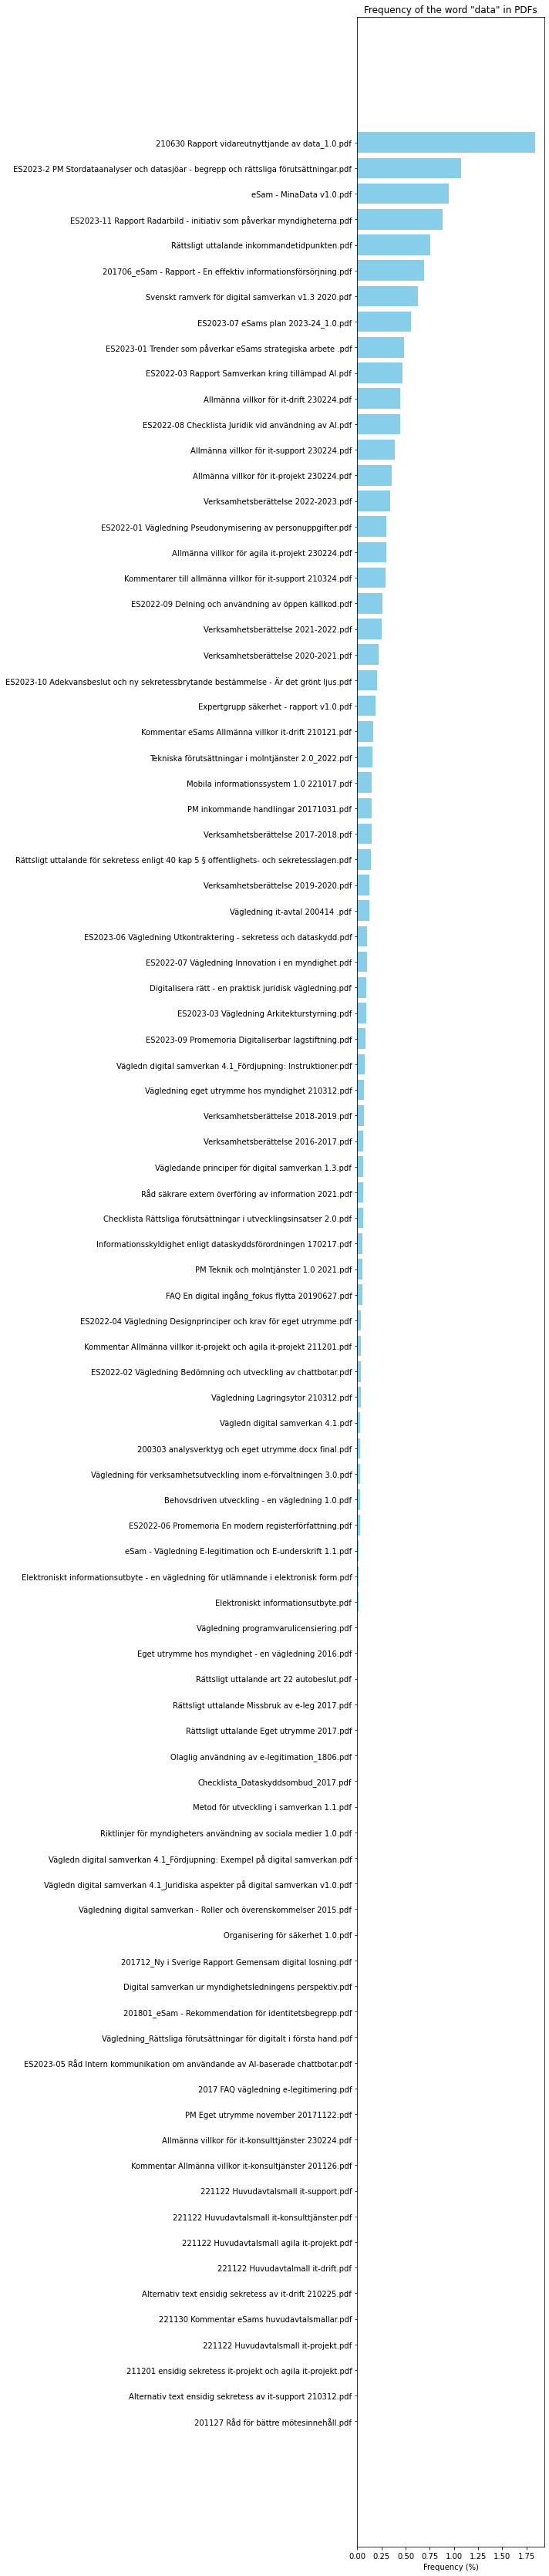

In [14]:
import urllib.parse
import mplcursors

# ...

# Plotting
plt.figure(figsize=(10, len(sorted_results) * 0.5))
bar_container = plt.barh([urllib.parse.unquote(os.path.basename(url)) for url in sorted_results.keys()],
                         list(sorted_results.values()), color='skyblue')

# Adding clickable URL annotations
mplcursors.cursor(bar_container, hover=False).connect(
    "add", lambda sel: sel.annotation.set_text(sorted_results[list(sorted_results.keys())[sel.target.index]])
)

plt.xlabel('Frequency (%)')
plt.title('Frequency of the word "data" in PDFs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
import pkg_resources

for dist in pkg_resources.working_set:
    print(dist.project_name, dist.version)

Babel 2.11.0
Deprecated 1.2.13
GitPython 3.1.31
Jinja2 3.1.2
Mako 1.1.5
MarkupSafe 2.1.2
Pillow 9.4.0
PyGithub 1.58.0
PyJWT 2.6.0
PyNaCl 1.5.0
PySocks 1.7.1
PyYAML 5.4.1
Pygments 2.10.0
SQLAlchemy 1.4.26
Send2Trash 1.8.0
absl-py 1.4.0
aiobotocore 2.4.2
aiofiles 22.1.0
aiohttp 3.8.4
aioitertools 0.11.0
aiosignal 1.3.1
aiosqlite 0.18.0
alembic 1.7.4
ansiwrap 0.8.4
anyio 3.3.4
argon2-cffi 21.1.0
arrow 1.2.3
astroid 2.14.2
async-generator 1.10
async-timeout 4.0.2
attrs 21.2.0
autopep8 1.6.0
backcall 0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4 4.11.2
black 23.1.0
bleach 4.1.0
blinker 1.4
boto3 1.24.59
botocore 1.27.59
brotlipy 0.7.0
cachetools 5.3.0
certifi 2022.12.7
certipy 0.1.3
cffi 1.14.6
chardet 4.0.0
charset-normalizer 2.0.0
ci-info 0.3.0
click 8.1.3
cloudpickle 2.2.1
colorama 0.4.4
conda 4.10.3
conda-package-handling 1.7.3
configobj 5.0.8
configparser 6.0.0
contourpy 1.0.7
cryptography 39.0.2
cycler 0.11.0
debugpy 1.4.1
decorator 5.1.0
defusedxml 0.7.1
deprecation 2.1.0
